# Non-Negative Matrix Factorization

NNMF is a decomposition technique especially for non-negative data. 

In [ ]:
import matplotlib.pyplot as plt
from time import time

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF

import numpy as np

In [3]:
"""

'Labelled Faces in the Wild' dataset. 

"""


ldw_people =  fetch_lfw_people()

In [4]:
X = np.vstack([img.flatten() for img in ldw_people.images])
X.shape

(13233, 2914)

In [6]:
"""
SVD
"""
t0 = time()

U,S,V=np.linalg.svd(X,full_matrices=False)

print("Full SVD on %i pictures with %i pixels took %1.3f minutes" % (X.shape[0],X.shape[1],(time()-t0)/60))

"""
NNMF
"""

t0 = time()

model = NMF(n_components=300, init='random', random_state=0,beta_loss='frobenius')
W = model.fit_transform(X.T)
H = model.components_

print("300 component NNMF on %i pictures with %i pixels took %1.3f minutes" % (X.shape[0],X.shape[1],(time()-t0)/60))

SVD on 13233 pictures with 2914 pixels took 0.527 minutes
NNMF on 13233 pictures with 2914 pixels took 9.511 minutes


In [7]:
W.shape

(2914, 300)

In [8]:
H.shape

(300, 13233)

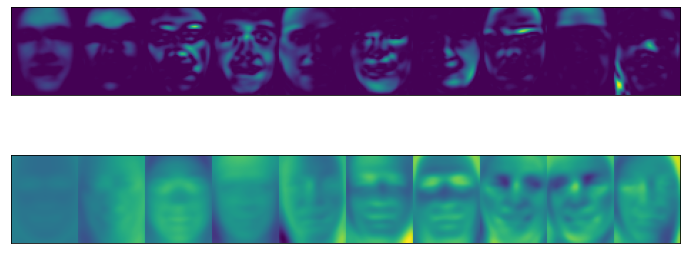

In [31]:
nmf = np.hstack([h.reshape(62,47)/np.std(h) for h in W[:,:10].T])
svd = np.hstack([v.reshape(62,47) for v in V[:10]])


plt.figure(figsize=(12,5))

ax1 = plt.subplot(2,1,1)
ax1.imshow(nmf,aspect='equal')

ax2 = plt.subplot(2,1,2)
ax2.imshow(svd)


for a in [ax1,ax2]:
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)

In [ ]:
"""
This will take forever to run.
"""


def nnmf(N):
    
    t0 = time()
    model = NMF(n_components=N, init='random', random_state=0,beta_loss='frobenius')
    W = model.fit_transform(X.T)
    H = model.components_[:,:100] # don't keep all of the faces

    print("%i component NNMF on %i pictures with %i pixels took %1.3f minutes" % (N,X.shape[0],X.shape[1],(time()-t0)/60))

    return W,H



res = []
for N in [1,48,100,200,300,500,2914]:
    res += [nnmf(N)]
    


1 component NNMF on 13233 pictures with 2914 pixels took 0.025 minutes
48 component NNMF on 13233 pictures with 2914 pixels took 0.780 minutes
100 component NNMF on 13233 pictures with 2914 pixels took 1.584 minutes
200 component NNMF on 13233 pictures with 2914 pixels took 4.615 minutes
300 component NNMF on 13233 pictures with 2914 pixels took 9.827 minutes


In [ ]:
fig,ax = plt.subplots(len(res),2,figsize=(20,14))

def nnmf_basisface(i,W):
    return np.log(W[:,i]/np.std(W[:,i])+1).reshape(62,47)

def get_face(i,W,H):
    X = np.matmul(W,H)[:,i]
    return X.reshape(62,47)


for n,a in enumerate(ax[0]):
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    
    W = res[n][0]
    H = res[n][1]
    n_basisfaces = min(len(H),6)
    
    basisfaces = np.hstack([nnmf_basisface(i,W) for i in range(n_basisfaces)])
    
    a.imshow(basisfaces,aspect='equal')
    [a.text(x=47*i,58,s=str(1+i),color='white',fontsize=12) for i in range(n_basisfaces)]
    
    

for n,a in enumerate(ax[1]):
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    
    W = res[n][0]
    H = res[n][1]
    N = [1,48,100,200,300,500,2914][n]
    n_samplefaces = 6
    
    samplefaces = np.hstack([get_face(i,W,H) for i in range(n_samplefaces)])
    
    a.imshow(samplefaces,aspect='equal')
    a.text(x=0,y=58,s=str(N),color='white',fontsize=12)